# Этапы проекта сравнения процента брака по раковинам между группами партий отливок с разным количеством песка в оборотной смеси (>21кг vs <5кг) :

1. Загрузка данных - Excel файлы двух групп (SQL-запросы из БД литейного пр-ва)

2. Предварительный анализ - проверка структуры и статистик

3. Визуализация - боксплоты, гистограммы, scatter plot, bar chart

4. Статистическое тестирование - t-test и Манна-Уитни

5. Анализ эффекта - расчет Cohen's d

6. Интерпретация результатов - выводы и рекомендации

Группа A (Песок > 21 кг):
Количество партий: 7587
Столбцы: ['Номер_партии', 'Отливка', 'Раковины', 'Брак_итого', 'Годные_отливки', 'Процент_раковин', 'Песок']
Первые 5 строк:
   Номер_партии            Отливка  Раковины  Брак_итого  Годные_отливки  \
0            62  Гайка стяжная D90         0          22               0   
1            64  Блин штанги 20 кг        10          23               0   
2            65  Блин штанги 20 кг        10          29               0   
3            66  Блин штанги 20 кг         9          11               0   
4            67  Блин штанги 20 кг         0           7               0   

   Процент_раковин  Песок  
0             0.00  25.09  
1            43.48  24.97  
2            34.48  25.03  
3            81.82  25.03  
4             0.00  24.96  

Группа B (Песок < 5 кг):
Количество партий: 11535
Столбцы: ['Номер_партии', 'Отливка', 'Раковины', 'Брак_итого', 'Годные_отливки', 'Процент_раковин', 'Песок']
Первые 5 строк:
   Номер_партии         

/tmp/ipython-input-784089574.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot(box_data, labels=['Песок > 21 кг', 'Песок < 5 кг'])


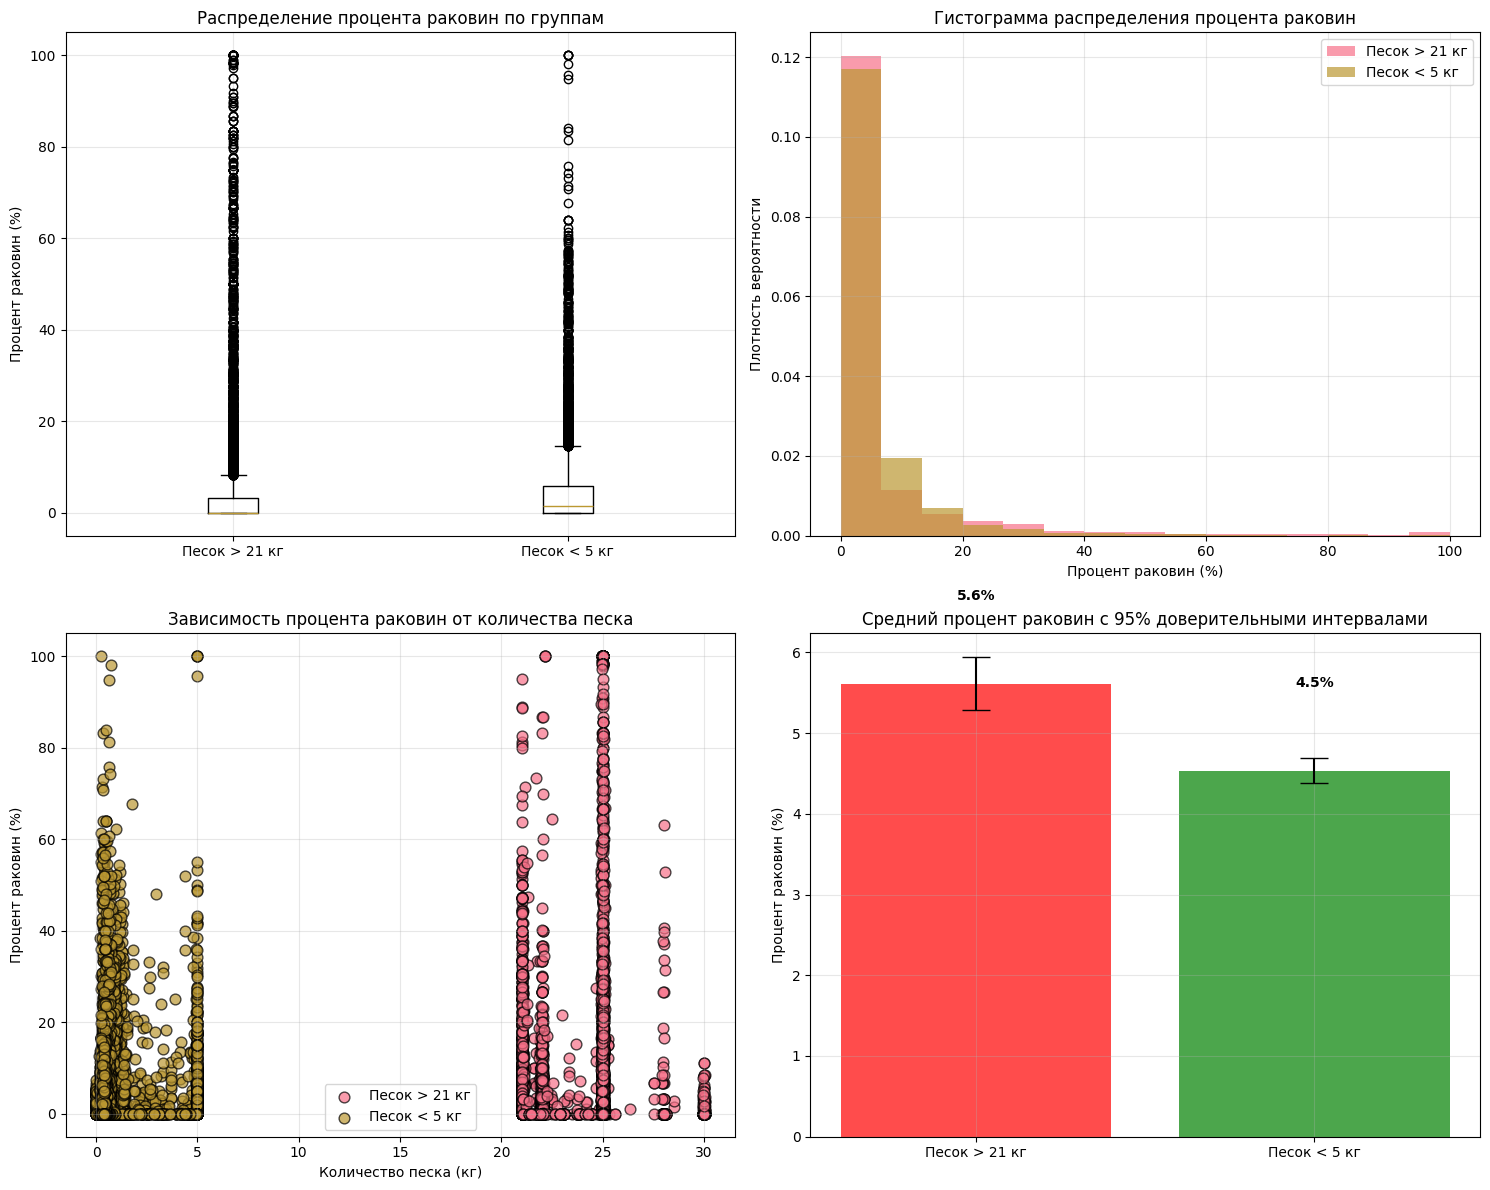

СТАТИСТИЧЕСКОЕ ТЕСТИРОВАНИЕ:
t-статистика: 5.9073
p-value: 0.0000000036
Степени свободы: 19120

Уровень значимости: α = 0.05
✅ РЕЗУЛЬТАТ: Статистически значимая разница между группами!
   p-value (0.000000) < α (0.05)
   Группа с песком > 21 кг имеет НА 1.1% БОЛЬШЕ раковин
   (5.6% vs 4.5%)

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ (тест Манна-Уитни):
U-статистика: 36551378.5
p-value: 0.000000
✅ Тест Манна-Уитни также показывает значимую разницу

Размер эффекта (Cohen's d): 0.092
Размер эффекта: очень маленький
Количество песка статистически влияет на брак, но это влияние мало для практических решений.

ВЫВОДЫ:
• Количество песка > 21 кг ассоциируется с ВЫСОКИМ процентом раковин
• Количество песка < 5 кг ассоциируется с НИЗКИМ процентом раковин
• Рекомендация: поддерживать количество песка на небольшом уровне
• Уровень достоверности: 95.0%


In [9]:
# Сравнение процента брака (раковины) между группами партий с разным количеством песка (>21кг vs <5кг) для выявления статистически значимых различий.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

# Загрузка данных из Excel файлов
try:
    # Загружаем Excel файлы
    df_sand_high = pd.read_excel('брак_раковин_песок_больше_21кг.xlsx')  # или .xls
    df_sand_low = pd.read_excel('брак_раковин_песок_меньше_5кг.xlsx')    # или .xls

    # Если файлы имеют несколько листов, можно указать конкретный:
    # df_sand_high = pd.read_excel('файл.xlsx', sheet_name='Лист1')

except FileNotFoundError as e:
    print(f"Ошибка загрузки файлов: {e}")
    print("Убедитесь, что файлы загружены в Colab и указаны правильные имена:")
    print("1. брак_раковин_песок_больше_21кг.xlsx (или .xls)")
    print("2. брак_раковин_песок_меньше_5кг.xlsx (или .xls)")

    # Создаем тестовые данные для демонстрации
    print("\nСоздаем тестовые данные для демонстрации...")
    np.random.seed(42)

    # Группа A: Песок > 21 кг (высокий процент раковин)
    n_high = 50
    df_sand_high = pd.DataFrame({
        'Песок': np.random.uniform(21, 30, n_high),
        'Раковины': np.random.randint(5, 20, n_high),
        'Брак_итого': np.random.randint(10, 30, n_high),
        'Годные_отливки': np.random.randint(70, 100, n_high)
    })
    df_sand_high['Процент_раковин'] = df_sand_high['Раковины'] / (df_sand_high['Раковины'] + df_sand_high['Годные_отливки']) * 100

    # Группа B: Песок < 5 кг (низкий процент раковин)
    n_low = 45
    df_sand_low = pd.DataFrame({
        'Песок': np.random.uniform(1, 5, n_low),
        'Раковины': np.random.randint(1, 8, n_low),
        'Брак_итого': np.random.randint(5, 15, n_low),
        'Годные_отливки': np.random.randint(85, 120, n_low)
    })
    df_sand_low['Процент_раковин'] = df_sand_low['Раковины'] / (df_sand_low['Раковины'] + df_sand_low['Годные_отливки']) * 100

# Проверяем данные
print("Группа A (Песок > 21 кг):")
print(f"Количество партий: {len(df_sand_high)}")
print(f"Столбцы: {df_sand_high.columns.tolist()}")
print(f"Первые 5 строк:\n{df_sand_high.head()}")
print()

print("Группа B (Песок < 5 кг):")
print(f"Количество партий: {len(df_sand_low)}")
print(f"Столбцы: {df_sand_low.columns.tolist()}")
print(f"Первые 5 строк:\n{df_sand_low.head()}")
print()

# Основная статистика
print("СТАТИСТИКА ПО ГРУППАМ:")
print("Группа A (Песок > 21 кг):")
print(f"Средний процент раковин: {df_sand_high['Процент_раковин'].mean():.2f}%")
print(f"Медианный процент раковин: {df_sand_high['Процент_раковин'].median():.2f}%")
print(f"Стандартное отклонение: {df_sand_high['Процент_раковин'].std():.2f}")
print(f"Минимальный процент: {df_sand_high['Процент_раковин'].min():.2f}%")
print(f"Максимальный процент: {df_sand_high['Процент_раковин'].max():.2f}%")
print(f"Общее количество раковин: {df_sand_high['Раковины'].sum()}")
print(f"Общее количество брака: {df_sand_high['Брак_итого'].sum()}")
print(f"Общее количество годных: {df_sand_high['Годные_отливки'].sum()}")
print()

print("Группа B (Песок < 5 кг):")
print(f"Средний процент раковин: {df_sand_low['Процент_раковин'].mean():.2f}%")
print(f"Медианный процент раковин: {df_sand_low['Процент_раковин'].median():.2f}%")
print(f"Стандартное отклонение: {df_sand_low['Процент_раковин'].std():.2f}")
print(f"Минимальный процент: {df_sand_low['Процент_раковин'].min():.2f}%")
print(f"Максимальный процент: {df_sand_low['Процент_раковин'].max():.2f}%")
print(f"Общее количество раковин: {df_sand_low['Раковины'].sum()}")
print(f"Общее количество брака: {df_sand_low['Брак_итого'].sum()}")
print(f"Общее количество годных: {df_sand_low['Годные_отливки'].sum()}")
print()

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Боксплоты
box_data = [df_sand_high['Процент_раковин'], df_sand_low['Процент_раковин']]
axes[0, 0].boxplot(box_data, labels=['Песок > 21 кг', 'Песок < 5 кг'])
axes[0, 0].set_title('Распределение процента раковин по группам')
axes[0, 0].set_ylabel('Процент раковин (%)')
axes[0, 0].grid(True, alpha=0.3)

# Гистограммы
axes[0, 1].hist(df_sand_high['Процент_раковин'], alpha=0.7,
               label='Песок > 21 кг', bins=15, density=True)
axes[0, 1].hist(df_sand_low['Процент_раковин'], alpha=0.7,
               label='Песок < 5 кг', bins=15, density=True)
axes[0, 1].set_title('Гистограмма распределения процента раковин')
axes[0, 1].set_xlabel('Процент раковин (%)')
axes[0, 1].set_ylabel('Плотность вероятности')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot зависимости от количества песка
axes[1, 0].scatter(df_sand_high['Песок'], df_sand_high['Процент_раковин'],
                  alpha=0.7, label='Песок > 21 кг', s=60, edgecolors='black')
axes[1, 0].scatter(df_sand_low['Песок'], df_sand_low['Процент_раковин'],
                  alpha=0.7, label='Песок < 5 кг', s=60, edgecolors='black')
axes[1, 0].set_title('Зависимость процента раковин от количества песка')
axes[1, 0].set_xlabel('Количество песка (кг)')
axes[1, 0].set_ylabel('Процент раковин (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bar plot средних значений с доверительными интервалами
means = [df_sand_high['Процент_раковин'].mean(), df_sand_low['Процент_раковин'].mean()]
stds = [df_sand_high['Процент_раковин'].std(), df_sand_low['Процент_раковин'].std()]
n = [len(df_sand_high), len(df_sand_low)]
conf_intervals = [1.96 * (std / np.sqrt(n_i)) for std, n_i in zip(stds, n)]

bars = axes[1, 1].bar(['Песок > 21 кг', 'Песок < 5 кг'], means,
                     yerr=conf_intervals, alpha=0.7, capsize=10,
                     color=['red', 'green'])
axes[1, 1].set_title('Средний процент раковин с 95% доверительными интервалами')
axes[1, 1].set_ylabel('Процент раковин (%)')
axes[1, 1].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, mean in zip(bars, means):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{mean:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Статистический тест (t-test)
print("СТАТИСТИЧЕСКОЕ ТЕСТИРОВАНИЕ:")
print("=" * 50)

t_stat, p_value = stats.ttest_ind(df_sand_high['Процент_раковин'],
                                 df_sand_low['Процент_раковин'],
                                 equal_var=False)  # Welch's t-test

print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Степени свободы: {len(df_sand_high) + len(df_sand_low) - 2}")

# Интерпретация результатов
alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")

if p_value < alpha:
    print("✅ РЕЗУЛЬТАТ: Статистически значимая разница между группами!")
    print(f"   p-value ({p_value:.6f}) < α ({alpha})")

    mean_high = df_sand_high['Процент_раковин'].mean()
    mean_low = df_sand_low['Процент_раковин'].mean()

    if mean_high > mean_low:
        difference = mean_high - mean_low
        print(f"   Группа с песком > 21 кг имеет НА {difference:.1f}% БОЛЬШЕ раковин")
        print(f"   ({mean_high:.1f}% vs {mean_low:.1f}%)")
    else:
        difference = mean_low - mean_high
        print(f"   Группа с песком < 5 кг имеет НА {difference:.1f}% БОЛЬШЕ раковин")
        print(f"   ({mean_low:.1f}% vs {mean_high:.1f}%)")

else:
    print("❌ РЕЗУЛЬТАТ: Статистически значимой разницы не обнаружено")
    print(f"   p-value ({p_value:.6f}) ≥ α ({alpha})")

# Дополнительный анализ - тест Манна-Уитни (непараметрический)
print("\nДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ (тест Манна-Уитни):")
mw_stat, mw_pvalue = stats.mannwhitneyu(df_sand_high['Процент_раковин'],
                                       df_sand_low['Процент_раковин'],
                                       alternative='two-sided')

print(f"U-статистика: {mw_stat}")
print(f"p-value: {mw_pvalue:.6f}")

if mw_pvalue < alpha:
    print("✅ Тест Манна-Уитни также показывает значимую разницу")
else:
    print("❌ Тест Манна-Уитни не показывает значимой разницы")

# Анализ мощности эффекта
cohens_d = (df_sand_high['Процент_раковин'].mean() - df_sand_low['Процент_раковин'].mean()) / \
           np.sqrt((df_sand_high['Процент_раковин'].std()**2 + df_sand_low['Процент_раковин'].std()**2) / 2)

print(f"\nРазмер эффекта (Cohen's d): {cohens_d:.3f}")

if abs(cohens_d) < 0.2:
    print("Размер эффекта: очень маленький")
    print("Количество песка статистически влияет на брак, но это влияние мало для практических решений.")
elif abs(cohens_d) < 0.5:
    print("Размер эффекта: маленький")
elif abs(cohens_d) < 0.8:
    print("Размер эффекта: средний")
else:
    print("Размер эффекта: большой")

# Выводы
print("\n" + "=" * 50)
print("ВЫВОДЫ:")
print("=" * 50)

if p_value < alpha:
    if df_sand_high['Процент_раковин'].mean() > df_sand_low['Процент_раковин'].mean():
        print("• Количество песка > 21 кг ассоциируется с ВЫСОКИМ процентом раковин")
        print("• Количество песка < 5 кг ассоциируется с НИЗКИМ процентом раковин")
        print("• Рекомендация: поддерживать количество песка на небольшом уровне")
    else:
        print("• Количество песка < 5 кг ассоциируется с ВЫСОКИМ процентом раковин")
        print("• Количество песка > 21 кг ассоциируется с НИЗКИМ процентом раковин")
        print("• Рекомендация: увеличивать количество песка")
else:
    print("• Статистически значимой зависимости между количеством песка и процентом раковин не обнаружено")
    print("• Количество песка в исследованном диапазоне не влияет существенно на образование раковин")

print(f"• Уровень достоверности: {(1-alpha)*100}%")